# **데이터프레임 결합**


## **1.환경준비**

* 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* 데이터 가져오기

In [43]:
sales = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/ts_sales_simple.csv")

sales1 = sales.loc[sales['Store_ID']==1]
sales2 = sales.loc[sales['Store_ID']==2]
sales5 = sales.loc[sales['Store_ID']==5]
sales11 = sales.loc[sales['Store_ID']==11]

products = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/ts_product_master.csv")
stores = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/ts_store_master.csv")

In [3]:
sales1.head()

,Order_ID,Date,Store_ID,Qty,Product_ID
0,3,2013-01-01,1,0.0,3
1,5,2013-01-01,1,0.0,5
2,7,2013-01-01,1,0.0,7
3,8,2013-01-01,1,0.0,8
4,10,2013-01-01,1,0.0,10


In [4]:
products.head()

,Product_ID,Product_Code,SubCategory,Category,LeadTime,Price
0,20,HG001,Gardening Tools,Household Goods,2,50
1,27,HH001,Home Appliances,Household Goods,2,150
2,16,HK001,Kitchen,Household Goods,2,23
3,15,HK002,Kitchen,Household Goods,2,41
4,32,GS001,Seafood,Grocery,3,34


In [5]:
stores.head()

,Store_ID,City,State,Store_Type
0,1,Saint Paul,Minnesota,4
1,2,Saint Paul,Minnesota,4
2,3,Saint Paul,Minnesota,4
3,4,Saint Paul,Minnesota,4
4,5,Oklahoma City,Oklahoma,4


## **2.결합1 : 붙이기 concat()**

* 데이터를 생성해 봅시다.

In [6]:
df1 = pd.DataFrame({'A':[10,25], 'B':[15,30]})
df2 = pd.DataFrame({'A':[20,30, 50], 'C':[35,30, 40]})
df2.drop([1], inplace = True)

display(df1)
display(df2)

,A,B
0,10,15
1,25,30


,A,C
0,20,35
2,50,40


### **(1) 세로로 합치기 : axis = 0**

* join = 'inner'

In [7]:
pd.concat([df1, df2], axis = 0, join = 'inner')

,A
0,10
1,25
0,20
2,50


* join = 'outer'

In [8]:
pd.concat([df1, df2], axis = 0, join = 'outer')

,A,B,C
0,10,15.0,NaN
1,25,30.0,NaN
0,20,NaN,35.0
2,50,NaN,40.0


### **(2) 가로로 합치기 : axis = 1**

* join = 'inner'

In [9]:
pd.concat([df1, df2], axis = 1, join = 'inner')

,A,B,A,C
0,10,15,20,35


* join = 'outer'

In [10]:
pd.concat([df1, df2], axis = 1, join = 'outer')

,A,B,A,C
0,10.0,15.0,20.0,35.0
1,25.0,30.0,NaN,NaN
2,NaN,NaN,50.0,40.0


<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

[문1] sales1,2,5,11 데이터프레임을 하나로 합칩시다. 어떻게 합치는게 좋을까요?

In [13]:
print(sales1.head())
print(sales2.head())
print(sales11.head())


   Order_ID        Date  Store_ID  Qty  Product_ID
0         3  2013-01-01         1  0.0           3
1         5  2013-01-01         1  0.0           5
2         7  2013-01-01         1  0.0           7
3         8  2013-01-01         1  0.0           8
4        10  2013-01-01         1  0.0          10
     Order_ID        Date  Store_ID  Qty  Product_ID
165       366  2013-01-01         2  0.0           3
166       368  2013-01-01         2  0.0           5
167       370  2013-01-01         2  0.0           7
168       371  2013-01-01         2  0.0           8
169       373  2013-01-01         2  0.0          10
    Order_ID        Date  Store_ID  Qty  Product_ID
30        69  2013-01-01        11  0.0           3
31        71  2013-01-01        11  0.0           5
32        73  2013-01-01        11  0.0           7
33        74  2013-01-01        11  0.0           8
34        76  2013-01-01        11  0.0          10


In [14]:
sales = pd.concat([sales1, sales2, sales5, sales11], axis=0, join='inner')
sales

,Order_ID,Date,Store_ID,Qty,Product_ID
0,3,2013-01-01,1,0.000,3
1,5,2013-01-01,1,0.000,5
2,7,2013-01-01,1,0.000,7
3,8,2013-01-01,1,0.000,8
4,10,2013-01-01,1,0.000,10
...,...,...,...,...,...
24340,53548,2013-01-31,11,10.000,22
24341,53550,2013-01-31,11,641.507,24
24342,53553,2013-01-31,11,0.000,27
24343,53555,2013-01-31,11,27.000,29


[문2] (조금 어려운 문제!)  
일별, 매장별 판매량 합계를 구해 봅시다.  
groupby, pd.concat 을 이용하여 다음과 같은 결과를 얻도록 코드를 작성해봅시다.

* 힌트
    * 1) sales1, 2, 5,11 로 부터 각각 일별 판매량 합계 집계하기
        * 집계시 .agg() 를 이용하여 열이름 변경하거나, 집계후 열이름 변경하기
    * 2) pd.concat 으로 가로로 합치기



In [24]:
qty=sales.groupby(['Date', 'Store_ID'], as_index=False)['Qty'].sum()
qty

,Date,Store_ID,Qty
0,2013-01-01,1,0.000000
1,2013-01-01,2,0.000000
2,2013-01-01,5,0.000000
3,2013-01-01,11,0.000000
4,2013-01-02,1,6760.782000
...,...,...,...
119,2013-01-30,11,7744.136020
120,2013-01-31,1,4341.563000
121,2013-01-31,2,4862.804996
122,2013-01-31,5,5230.479000


## **3.결합 ① : 조인 join(merge)**

* 판다스에서 join은 굉장히 간단합니다.
* 자동으로 key를 잡아줍니다
* default로 inner join을 합니다.

In [25]:
df1 = pd.DataFrame({'A':[1,2], 'B':[15,30], 'C':[20, 25]})
df2 = pd.DataFrame({'A':[2,3], 'D':[20, 35]})

display(df1)
display(df2)

,A,B,C
0,1,15,20
1,2,30,25


,A,D
0,2,20
1,3,35


### **(1) inner merge**

In [26]:
pd.merge(df1, df2, how = 'inner', on = 'A')

,A,B,C,D
0,2,30,25,20


In [27]:
pd.merge(df1, df2)

,A,B,C,D
0,2,30,25,20


In [28]:
pd.merge(df1, df2, how = 'inner')

,A,B,C,D
0,2,30,25,20


### **(2) left merge**

In [29]:
pd.merge(df1, df2, how = 'left')

,A,B,C,D
0,1,15,20,NaN
1,2,30,25,20.0


### **(3) right merge**

In [ ]:
pd.merge(df1, df2, how = 'right')

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

[문1] 일별, 매장별 판매량 합계를 구해 봅시다.  
groupby, pd.merge 을 이용하여 다음과 같은 결과를 얻도록 코드를 작성해봅시다.

* 힌트
    * 1) sales1, 2, 5,11 로 부터 각각 일별 판매량 합계 집계하기
        * 집계시 .agg() 를 이용하여 열이름 변경하거나, 집계후 열이름 변경하기
    * 2) pd.merge 으로 결합하기



In [ ]:
xxxx

[문2] 매장1에 대해서, 일별, 카테고리별 판매량 합계를 구해 봅시다. 



In [31]:
print(sales1.info())
print(products.info())
print(stores.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465 entries, 0 to 24314
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order_ID    465 non-null    int64  
 1   Date        465 non-null    object 
 2   Store_ID    465 non-null    int64  
 3   Qty         465 non-null    float64
 4   Product_ID  465 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 21.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product_ID    15 non-null     int64 
 1   Product_Code  15 non-null     object
 2   SubCategory   15 non-null     object
 3   Category      15 non-null     object
 4   LeadTime      15 non-null     int64 
 5   Price         15 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 848.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
Ran

In [34]:
df = pd.merge(sales, products, how='left')
df1 = df.groupby(['Date', 'Category'], as_index=False)['Qty'].sum()
df1

,Date,Category,Qty
0,2013-01-01,Drink,0.000000
1,2013-01-01,Food,0.000000
2,2013-01-01,Grocery,0.000000
3,2013-01-01,Household Goods,0.000000
4,2013-01-02,Drink,7160.000000
...,...,...,...
119,2013-01-30,Household Goods,4022.000000
120,2013-01-31,Drink,4693.000000
121,2013-01-31,Food,2916.778996
122,2013-01-31,Grocery,11581.970000


[문3] 도시별, 총판매량 합계를 구하시오.  



In [45]:
df3 = pd.merge(sales, stores)
df4 = df3.groupby('City', as_index=False)['Qty'].sum()
df4

,City,Qty
0,Albany,1.119409e+05
1,Annapolis,2.255278e+05
2,Asheville,6.644511e+04
3,Atlanta,3.845901e+05
4,Bloomington,1.315413e+05
5,Boston,1.138053e+05
6,Charlotte,1.454050e+05
7,Columbus,1.872153e+05
8,Harrisburg,1.421269e+05
9,Indianapolis,1.488044e+05


### **(4) pivot**
* pivot : 결합은 아니지만, 집계 후 데이터프레임 구조를 변형해서 조회하는데 종종 사용 됩니다.

* 단계
    * 1) groupby
    * 2) pivot

In [48]:
# 1) 매장1의 일별 카테고리별 판매량을 집계

temp = pd.merge(sales1, products)
temp2 = temp.groupby(['Date', 'Category'], as_index = False)['Qty'].sum()
temp2

,Date,Category,Qty
0,2013-01-01,Drink,0.000
1,2013-01-01,Food,0.000
2,2013-01-01,Grocery,0.000
3,2013-01-01,Household Goods,0.000
4,2013-01-02,Drink,1158.000
...,...,...,...
119,2013-01-30,Household Goods,932.000
120,2013-01-31,Drink,971.000
121,2013-01-31,Food,751.766
122,2013-01-31,Grocery,1907.797


In [49]:
# 2) pivot
temp3 = temp2.pivot(index='Category',columns= 'Date', values='Qty')
temp3

Date,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06,2013-01-07,2013-01-08,2013-01-09,2013-01-10,...,2013-01-22,2013-01-23,2013-01-24,2013-01-25,2013-01-26,2013-01-27,2013-01-28,2013-01-29,2013-01-30,2013-01-31
Category,,,,,,,,,,,,,,,,,,,,,
Drink,0.0,1158.000,985.000000,1055.000000,1319.000,407.000,1267.000,1115.000,1290.00000,914.000,...,1114.000,1152.000,924.000,1213.000,1132.000,417.000,830.000,999.000,1140.000,971.000
Food,0.0,1227.652,913.699000,790.366000,901.057,416.912,852.676,829.851,967.58200,775.515,...,780.201,1025.047,791.388,836.856,880.019,416.783,821.064,668.154,900.092,751.766
Grocery,0.0,3305.130,2613.685001,2711.079001,2746.782,926.282,2689.720,2356.277,3023.57298,1933.235,...,2242.216,2824.296,2221.805,2393.208,2257.907,1162.207,2208.364,2001.047,2662.485,1907.797
Household Goods,0.0,1070.000,836.000000,834.000000,821.000,257.000,830.000,830.000,917.00000,687.000,...,786.000,769.000,622.000,701.000,551.000,247.000,625.000,617.000,932.000,711.000


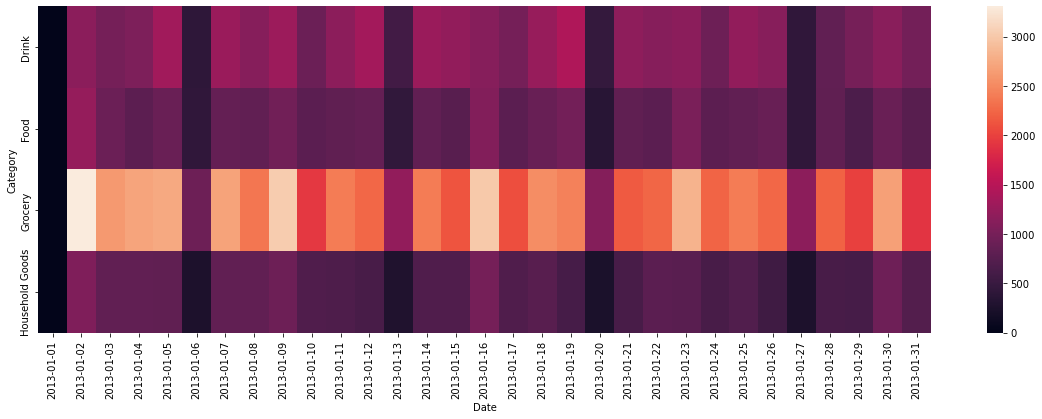

In [50]:
# sns.heatmap으로 시각화 할 수도 있습니다!

plt.figure(figsize = (20, 6))
sns.heatmap(temp3)
plt.show()

## **4.복습문제**

In [2]:
# 라이브러리 불러오기
import pandas as pd

In [3]:
sales = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/ts_sales_simple.csv")
products = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/ts_product_master.csv")
stores = pd.read_csv("https://raw.githubusercontent.com/DA4BAM/dataset/master/ts_store_master.csv")

1) sales에 금액(Amt) 변수를 추가하시오.
* Amt = Qty * Price

In [5]:
print(sales.head(2))
print(products.head(2))
print(stores.head(2))

   Order_ID        Date  Store_ID  Qty  Product_ID
0         3  2013-01-01         1  0.0           3
1         5  2013-01-01         1  0.0           5
   Product_ID Product_Code      SubCategory         Category  LeadTime  Price
0          20        HG001  Gardening Tools  Household Goods         2     50
1          27        HH001  Home Appliances  Household Goods         2    150
   Store_ID        City      State  Store_Type
0         1  Saint Paul  Minnesota           4
1         2  Saint Paul  Minnesota           4


In [9]:
sales['Amt'] = sales['Qty'] * products['Price']
sales

,Order_ID,Date,Store_ID,Qty,Product_ID,Amt
0,3,2013-01-01,1,0.000,3,0.0
1,5,2013-01-01,1,0.000,5,0.0
2,7,2013-01-01,1,0.000,7,0.0
3,8,2013-01-01,1,0.000,8,0.0
4,10,2013-01-01,1,0.000,10,0.0
...,...,...,...,...,...,...
25105,55231,2013-01-31,9,47.000,22,NaN
25106,55233,2013-01-31,9,348.475,24,NaN
25107,55236,2013-01-31,9,0.000,27,NaN
25108,55238,2013-01-31,9,42.000,29,NaN


In [8]:
temp1 = pd.merge(sales, products[['Product_ID', 'Price', 'Category', 'SubCategory']], how='inner', on='Product_ID')
temp1['Amt'] = temp1['Price'] * temp1['Qty']
temp1.head(3)

,Order_ID,Date,Store_ID,Qty,Product_ID,Price,Category,SubCategory,Amt
0,3,2013-01-01,1,0.0,3,8,Drink,Beverage,0.0
1,36,2013-01-01,10,0.0,3,8,Drink,Beverage,0.0
2,69,2013-01-01,11,0.0,3,8,Drink,Beverage,0.0


2) City별 매출액

In [9]:
temp2 = pd.merge(temp1, stores)

temp2.groupby('City', as_index=False)['Amt'].sum()

,City,Amt
0,Albany,9.618918e+05
1,Annapolis,1.926923e+06
2,Asheville,5.699986e+05
3,Atlanta,3.374833e+06
4,Bloomington,1.154652e+06
5,Boston,9.879414e+05
6,Charlotte,1.229219e+06
7,Columbus,1.650586e+06
8,Harrisburg,1.345873e+06
9,Indianapolis,1.256235e+06


In [13]:
df.groupby('City', as_index=False)['Qty'].sum()

,City,Qty
0,Albany,1.119409e+05
1,Annapolis,2.255278e+05
2,Asheville,6.644511e+04
3,Atlanta,3.845901e+05
4,Bloomington,1.315413e+05
5,Boston,1.138053e+05
6,Charlotte,1.454050e+05
7,Columbus,1.872153e+05
8,Harrisburg,1.421269e+05
9,Indianapolis,1.488044e+05


3) City별 카테고리별 매출액

In [14]:
df1 = pd.merge(df, products, how='left')
df1

,Order_ID,Date,Store_ID,Qty,Product_ID,Amt,City,State,Store_Type,Product_Code,SubCategory,Category,LeadTime,Price
0,3,2013-01-01,1,0.000,3,0.0,Saint Paul,Minnesota,4,DB001,Beverage,Drink,2,8
1,5,2013-01-01,1,0.000,5,0.0,Saint Paul,Minnesota,4,FB001,BAKERY,Food,2,6
2,7,2013-01-01,1,0.000,7,0.0,Saint Paul,Minnesota,4,HC001,Cleaning,Household Goods,2,15
3,8,2013-01-01,1,0.000,8,0.0,Saint Paul,Minnesota,4,FM001,Milk,Food,2,4
4,10,2013-01-01,1,0.000,10,0.0,Saint Paul,Minnesota,4,GE001,EGGS,Grocery,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25105,55231,2013-01-31,9,47.000,22,NaN,Saint Paul,Minnesota,2,DA001,Alcohol,Drink,2,12
25106,55233,2013-01-31,9,348.475,24,NaN,Saint Paul,Minnesota,2,GM001,Meats,Grocery,3,17
25107,55236,2013-01-31,9,0.000,27,NaN,Saint Paul,Minnesota,2,HH001,Home Appliances,Household Goods,2,150
25108,55238,2013-01-31,9,42.000,29,NaN,Saint Paul,Minnesota,2,FP001,Prepared,Food,2,18


In [11]:
temp2.groupby(['City', 'Category'], as_index=False)['Amt'].sum()

,City,Category,Amt
0,Albany,Drink,2.367080e+05
1,Albany,Food,6.998561e+04
2,Albany,Grocery,3.676481e+05
3,Albany,Household Goods,2.875500e+05
4,Annapolis,Drink,3.507200e+05
...,...,...,...
79,Saint Paul,Household Goods,1.081224e+07
80,Wilmington,Drink,0.000000e+00
81,Wilmington,Food,0.000000e+00
82,Wilmington,Grocery,0.000000e+00


4) 매출액이 가장 높은 주(state) top 3

In [12]:
temp2.groupby('State', as_index=False)['Amt'].sum().sort_values('Amt', ascending=False).head(3)

# temp3 = temp2.groupby('State', as_index=False)['Amt'].sum()
# temp3.sort_values('Amt', ascending=False).head(3)
#간결하게 적는 것이 좋음

,State,Amt
6,Minnesota,4.733903e+07
8,North Carolina,1.133845e+07
0,Arizona,4.192750e+06


추가 문제

* 2013년 1월 세째 주 각 도시별 subCategory별 금액 비교
    1. 2013년 1월 세째 주
        * sales['Date']를 날짜 타입으로 변환
        * week 추가
        * sales에서 week가 3인 데이터 뽑기
    2. 각 도시별 subCategory별
        * 1의 결과에서...
        * stores와 inner merge
        * products와 inner merge
    3. 도시별 subCategory별 금액
        * Qty * Price로 Amt 추가
        * groupby
    4. 좀더 보기 좋게! pivot + heatmap
        * pivot
        * heatmap

In [37]:
sales['Date'] = pd.to_datetime(sales['Date'])
sales['Week'] = sales['Date'].dt.isocalendar().week
df1 = sales.loc[sales['Week']==3]

In [38]:
df2 = pd.merge(df1, stores, how='inner')
df3 = pd.merge(df2, products, how='inner')
df3

,Order_ID,Date,Store_ID,Qty,Product_ID,Amt,Week,City,State,Store_Type,Product_Code,SubCategory,Category,LeadTime,Price
0,23169,2013-01-14,1,1178.000000,3,NaN,3,Saint Paul,Minnesota,4,DB001,Beverage,Drink,2,8
1,24951,2013-01-15,1,1149.000000,3,NaN,3,Saint Paul,Minnesota,4,DB001,Beverage,Drink,2,8
2,26733,2013-01-16,1,1043.000000,3,NaN,3,Saint Paul,Minnesota,4,DB001,Beverage,Drink,2,8
3,28515,2013-01-17,1,898.000000,3,NaN,3,Saint Paul,Minnesota,4,DB001,Beverage,Drink,2,8
4,30297,2013-01-18,1,1130.000000,3,NaN,3,Saint Paul,Minnesota,4,DB001,Beverage,Drink,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5665,28511,2013-01-16,9,16.543000,32,NaN,3,Saint Paul,Minnesota,2,GS001,Seafood,Grocery,3,34
5666,30293,2013-01-17,9,20.087000,32,NaN,3,Saint Paul,Minnesota,2,GS001,Seafood,Grocery,3,34
5667,32075,2013-01-18,9,9.563000,32,NaN,3,Saint Paul,Minnesota,2,GS001,Seafood,Grocery,3,34
5668,33857,2013-01-19,9,30.755001,32,NaN,3,Saint Paul,Minnesota,2,GS001,Seafood,Grocery,3,34


In [41]:
df3['Amt'] = sales['Qty'] * products['Price']
df3.groupby(['City', 'SubCategory'], as_index=False)['Amt'].sum()

array([0.])